Name : Rajive Kumaranayake
### Data Analysis Project

#### Grocery Sales Analyse


# **1. FRAME**

### **Bussiness Problem:**

A grocery sales company is looking for patterns in its sales data regarding regions, sales reps, and product categories. Conduct an analysis to surface any notable patterns, particularly related to sales results.

### **Business Question:**
What regions, which sales reps, and what product categories shows the highest/lowest sales performance and find insights that might help to increase sales performance in underperformig regions, sales reps and product categories.

### **Business Sub Questions** 
#### Regions 
- 1.1 Which regions and cities contribute the most and least to total sales and profit?
- 1.2 What are the Regions with highest and lowest Profit and Profit Margins?
- 1.3 Are there Regions with potential for growth?
  
#### Sales Reps
- 2.1 Which sales representatives achieve the highest and lowest sales?
- 2.2 What is the relationship between sales rep performance and their regions?

#### Product Categories 
- 3.1 How do sales and profit vary by product group, product line, and product type?
- 3.2 Which Products Groups and Product types have the highest and lowest profit margins?

# **2. EXTRACT**

### Import libraries

In [7]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from io import StringIO # used in 3.2 for dual axis plots https://stackoverflow.com/questions/24183101/bar-plot-with-two-bars-and-two-y-axis

In [8]:
# names of all the databases we have
os.listdir('./grocery-sales')

['cities.csv',
 'customers.csv',
 'item_master.csv',
 'sales.csv',
 'sales_rep.csv']

In [9]:
# check databases before we extract
for file in os.listdir('./grocery-sales'):
    print(f"{file}")
    display(pd.read_csv('./grocery-sales'+'/'+file,encoding = 'ISO-8859-1', engine='python').head())

cities.csv


,City,City Code,Region,Latitude,Longitude,Desc
0,New York,1,USA,40.730599,-73.986581,"""New York City, NY, US"""
1,Los Angeles,2,USA,34.053678,-118.242702,"""Los Angeles, Los Angeles County, CA, US"""
2,Chicago,3,USA,41.875555,-87.624421,"""Chicago, Cook County, IL, US"""
3,Houston,4,USA,29.981501,-95.538360,"""Houston, Harris County, TX, US"""
4,Philadelphia,5,USA,39.952335,-75.163789,"""Philadelphia, Philadelphia County, PA, US"""


customers.csv


,Customer,Customer Number,City Code
0,A Superior System,10000453,1
1,A&B,10000456,76
2,A&G,10000457,2
3,A&R Partners,10000458,43
4,A1 Datacom Supply,10000461,77


item_master.csv


,Item Number,Product Group,Product Line,Product Sub Group,Product Type
0,10001,Beverages,Drink,Juice,Pure Juice Beverages
1,10002,Beverages,Drink,Flavored Drinks,Drinks
2,10003,Beverages,Drink,Flavored Drinks,Drinks
3,10004,Beverages,Drink,Soda,Carbonated Beverages
4,10005,Beverages,Drink,Soda,Carbonated Beverages


sales.csv


,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number
0,3428,-513.15,10012226,1/12/2012,-573.3835,1/12/2012,318960,Cutting Edge Sliced Ham,10696,-37.29,115785,1/12/2012,-550.44,-1.0,180
1,3429,-105.93,10012226,1/12/2012,-204.6638,1/12/2012,318960,Washington Cranberry Juice,10009,-90.54,115785,1/12/2012,-196.47,-2.0,180
2,3430,-88.07,10012226,1/12/2012,-165.8016,1/12/2012,318960,Moms Sliced Ham,10385,-71.10,115785,1/12/2012,-159.17,-3.0,180
3,3431,-43.12,10012226,1/12/2012,-118.3703,1/12/2012,318960,Tip Top Lox,10215,-70.52,115785,1/12/2012,-113.64,-1.0,180
4,3432,-37.98,10012226,1/12/2012,-102.3319,1/12/2012,318960,Just Right Beef Soup,10965,-60.26,115785,1/12/2012,-98.24,-1.0,180


sales_rep.csv


,Manager,Manager Number,Path,Sales Rep Name,Sales Rep Name1,Sales Rep Name2,Sales Rep Name3,Sales Rep ID
0,Amanda Honda,104,Amanda Honda-Amalia Craig,Amalia Craig,Amanda Honda,Amalia Craig,NaN,103
1,Amanda Honda,104,Amanda Honda-Cart Lynch,Cart Lynch,Amanda Honda,Cart Lynch,NaN,112
2,Amanda Honda,104,Amanda Honda-Molly McKenzie,Molly McKenzie,Amanda Honda,Molly McKenzie,NaN,159
3,Amanda Honda,104,Amanda Honda-Sheila Hein,Sheila Hein,Amanda Honda,Sheila Hein,NaN,176
4,Brenda Gibson,109,Brenda Gibson-Dennis Johnson,Dennis Johnson,Brenda Gibson,Dennis Johnson,NaN,121


### Extract Datasets

In [10]:
# read and extract all datasets
file_list = [dataset for dataset in os.listdir('./grocery-sales')] # syntax from stackoverflow
# https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
dataset_list = [file_name.split('.csv')[0] for file_name in file_list]
print(f"Datasets used in this analysis : {dataset_list}")
# Store datasets in variables
cities = pd.read_csv('./grocery-sales/'+file_list[0],encoding = 'ISO-8859-1', engine='python')
customers = pd.read_csv('./grocery-sales/'+file_list[1],encoding = 'ISO-8859-1', engine='python')
item_master = pd.read_csv('./grocery-sales/'+file_list[2],encoding = 'ISO-8859-1', engine='python')
sales = pd.read_csv('./grocery-sales/'+file_list[3],encoding = 'ISO-8859-1', engine='python')
sales_rep = pd.read_csv('./grocery-sales/'+file_list[4],encoding = 'ISO-8859-1', engine='python')

Datasets used in this analysis : ['cities', 'customers', 'item_master', 'sales', 'sales_rep']


# **3. WRANGLE / PREPARE**

### Rename Column Headers

In [11]:
sales.columns 

Index(['%KEY', 'Cost', 'Customer Number', 'Date', 'GrossSales', 'Invoice Date',
       'Invoice Number', 'Item Desc', 'Item Number', 'Margin', 'Order Number',
       'Promised Delivery Date', 'Sales', 'Sales Qty', 'Sales Rep Number'],
      dtype='object')

In [12]:
sales.shape

(96466, 15)

In [13]:
sales['%KEY'].nunique() # equals to the no of rows means this is unique. So this will be the primary key.

96466

In [14]:
# rename all column names to make it easier for analysis
sales.rename(columns={'%KEY': 'Sales_id'}, inplace=True) # ~ Primary Key 
sales.rename(columns={'Customer Number': 'Customer_number'}, inplace=True) 
sales.rename(columns={'GrossSales': 'Gross_sales'}, inplace=True) 
sales.rename(columns={'Invoice Date': 'Invoice_date'}, inplace=True)
sales.rename(columns={'Invoice Number': 'Invoice_number'}, inplace=True) 
sales.rename(columns={'Item Desc': 'Item_desc'}, inplace=True) 
sales.rename(columns={'Item Number': 'Item_number'}, inplace=True) 
sales.rename(columns={'Order Number': 'Order_number'}, inplace=True) 
sales.rename(columns={'Promised Delivery Date': 'Promised_delivery_date'}, inplace=True) 
sales.rename(columns={'Sales Qty': 'Sales_qty'}, inplace=True) 
sales.rename(columns={'Sales Rep Number': 'Sales_rep_number'}, inplace=True) 
sales.columns

Index(['Sales_id', 'Cost', 'Customer_number', 'Date', 'Gross_sales',
       'Invoice_date', 'Invoice_number', 'Item_desc', 'Item_number', 'Margin',
       'Order_number', 'Promised_delivery_date', 'Sales', 'Sales_qty',
       'Sales_rep_number'],
      dtype='object')

In [15]:
sales.head(3)

,Sales_id,Cost,Customer_number,Date,Gross_sales,Invoice_date,Invoice_number,Item_desc,Item_number,Margin,Order_number,Promised_delivery_date,Sales,Sales_qty,Sales_rep_number
0,3428,-513.15,10012226,1/12/2012,-573.3835,1/12/2012,318960,Cutting Edge Sliced Ham,10696,-37.29,115785,1/12/2012,-550.44,-1.0,180
1,3429,-105.93,10012226,1/12/2012,-204.6638,1/12/2012,318960,Washington Cranberry Juice,10009,-90.54,115785,1/12/2012,-196.47,-2.0,180
2,3430,-88.07,10012226,1/12/2012,-165.8016,1/12/2012,318960,Moms Sliced Ham,10385,-71.10,115785,1/12/2012,-159.17,-3.0,180


### Filter the sales dataframe with only with positive sales values

In [16]:
# Assumption - Negative sales means sales returns.
sales = sales[sales['Sales'] > 0] 

In [17]:
sales.head()

,Sales_id,Cost,Customer_number,Date,Gross_sales,Invoice_date,Invoice_number,Item_desc,Item_number,Margin,Order_number,Promised_delivery_date,Sales,Sales_qty,Sales_rep_number
9,3451,0.38,10002489,1/12/2012,1.4380,1/12/2012,319167,Super Vegetable Oil,10291,1.00,116691,1/12/2012,1.38,1.0,109
10,3452,0.46,10008381,1/12/2012,1.7848,1/12/2012,319174,Ebony Green Pepper,10801,1.25,116701,1/12/2012,1.71,1.0,111
11,3453,1.14,10000486,1/12/2012,3.3824,1/12/2012,319069,Imagine Frozen Pancakes,10707,2.10,116629,1/12/2012,3.24,2.0,162
12,3454,2.13,10000486,1/12/2012,4.5453,1/12/2012,319069,Gorilla Head Cheese,10673,2.24,116629,1/12/2012,4.37,3.0,162
13,3455,7.76,10021472,1/12/2012,5.6549,1/12/2012,319142,Imagine Frozen Carrots,10717,-2.34,116622,1/12/2012,5.42,1.0,154


In [18]:
sales.shape

(93730, 15)

### Date and Time

In [19]:
# Convert date into datetime
sales.Invoice_date = pd.to_datetime(sales.Invoice_date)

#### - Add Year column

In [20]:
sales['Invoice_year']=sales.Invoice_date.dt.year 
# https://www.geeksforgeeks.org/pandas-series-dt-year/
sales.head()

,Sales_id,Cost,Customer_number,Date,Gross_sales,Invoice_date,Invoice_number,Item_desc,Item_number,Margin,Order_number,Promised_delivery_date,Sales,Sales_qty,Sales_rep_number,Invoice_year
9,3451,0.38,10002489,1/12/2012,1.4380,2012-01-12,319167,Super Vegetable Oil,10291,1.00,116691,1/12/2012,1.38,1.0,109,2012
10,3452,0.46,10008381,1/12/2012,1.7848,2012-01-12,319174,Ebony Green Pepper,10801,1.25,116701,1/12/2012,1.71,1.0,111,2012
11,3453,1.14,10000486,1/12/2012,3.3824,2012-01-12,319069,Imagine Frozen Pancakes,10707,2.10,116629,1/12/2012,3.24,2.0,162,2012
12,3454,2.13,10000486,1/12/2012,4.5453,2012-01-12,319069,Gorilla Head Cheese,10673,2.24,116629,1/12/2012,4.37,3.0,162,2012
13,3455,7.76,10021472,1/12/2012,5.6549,2012-01-12,319142,Imagine Frozen Carrots,10717,-2.34,116622,1/12/2012,5.42,1.0,154,2012


#### - Add Month and Year Column

In [21]:
sales['Invoice_month']=sales.Invoice_date.dt.month.map("{:02}".format) 
# https://stackoverflow.com/questions/20990863/python-pandas-add-leading-zero-to-make-all-months-2-digits

In [22]:
sales.head()

,Sales_id,Cost,Customer_number,Date,Gross_sales,Invoice_date,Invoice_number,Item_desc,Item_number,Margin,Order_number,Promised_delivery_date,Sales,Sales_qty,Sales_rep_number,Invoice_year,Invoice_month
9,3451,0.38,10002489,1/12/2012,1.4380,2012-01-12,319167,Super Vegetable Oil,10291,1.00,116691,1/12/2012,1.38,1.0,109,2012,01
10,3452,0.46,10008381,1/12/2012,1.7848,2012-01-12,319174,Ebony Green Pepper,10801,1.25,116701,1/12/2012,1.71,1.0,111,2012,01
11,3453,1.14,10000486,1/12/2012,3.3824,2012-01-12,319069,Imagine Frozen Pancakes,10707,2.10,116629,1/12/2012,3.24,2.0,162,2012,01
12,3454,2.13,10000486,1/12/2012,4.5453,2012-01-12,319069,Gorilla Head Cheese,10673,2.24,116629,1/12/2012,4.37,3.0,162,2012,01
13,3455,7.76,10021472,1/12/2012,5.6549,2012-01-12,319142,Imagine Frozen Carrots,10717,-2.34,116622,1/12/2012,5.42,1.0,154,2012,01


In [23]:
sales['Invoice_yearMonth'] = sales.Invoice_year.astype(str)+'/'+sales.Invoice_month.astype(str)
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe

In [24]:
sales.head()

,Sales_id,Cost,Customer_number,Date,Gross_sales,Invoice_date,Invoice_number,Item_desc,Item_number,Margin,Order_number,Promised_delivery_date,Sales,Sales_qty,Sales_rep_number,Invoice_year,Invoice_month,Invoice_yearMonth
9,3451,0.38,10002489,1/12/2012,1.4380,2012-01-12,319167,Super Vegetable Oil,10291,1.00,116691,1/12/2012,1.38,1.0,109,2012,01,2012/01
10,3452,0.46,10008381,1/12/2012,1.7848,2012-01-12,319174,Ebony Green Pepper,10801,1.25,116701,1/12/2012,1.71,1.0,111,2012,01,2012/01
11,3453,1.14,10000486,1/12/2012,3.3824,2012-01-12,319069,Imagine Frozen Pancakes,10707,2.10,116629,1/12/2012,3.24,2.0,162,2012,01,2012/01
12,3454,2.13,10000486,1/12/2012,4.5453,2012-01-12,319069,Gorilla Head Cheese,10673,2.24,116629,1/12/2012,4.37,3.0,162,2012,01,2012/01
13,3455,7.76,10021472,1/12/2012,5.6549,2012-01-12,319142,Imagine Frozen Carrots,10717,-2.34,116622,1/12/2012,5.42,1.0,154,2012,01,2012/01


### Calculate and Add Profit and Discount colummns

In [25]:
def profit(row):
    return row['Sales']-row['Cost']
sales['Profit'] = sales.apply(profit, axis=1)
sales[['Sales', 'Cost','Profit']].head()

,Sales,Cost,Profit
9,1.38,0.38,1.00
10,1.71,0.46,1.25
11,3.24,1.14,2.10
12,4.37,2.13,2.24
13,5.42,7.76,-2.34


In [26]:
# Assumption : No allowance or returns. The difference between Gross sales and Sales(net) is the discount or overcharged only.
def discount(row):
    return row['Gross_sales']-row['Sales']
sales['Discount'] = sales.apply(discount, axis=1)
sales[['Gross_sales', 'Sales','Discount']].head()

,Gross_sales,Sales,Discount
9,1.4380,1.38,0.0580
10,1.7848,1.71,0.0748
11,3.3824,3.24,0.1424
12,4.5453,4.37,0.1753
13,5.6549,5.42,0.2349


In [27]:
def profit_margin(row):
    return row['Profit']/row['Sales']*100
sales['Profit_margin'] = sales.apply(profit_margin, axis=1)
sales[['Sales', 'Profit','Profit_margin']].head()

,Sales,Profit,Profit_margin
9,1.38,1.00,72.463768
10,1.71,1.25,73.099415
11,3.24,2.10,64.814815
12,4.37,2.24,51.258581
13,5.42,-2.34,-43.173432


### Merge Datasets

### - Merge cities dataset into sales dataset for regional patterns

In [28]:
cities.columns

Index(['City', 'City Code', 'Region', 'Latitude', 'Longitude', 'Desc'], dtype='object')

In [29]:
cities.rename(columns={'City Code': 'City_code'}, inplace=True)
cities.columns

Index(['City', 'City_code', 'Region', 'Latitude', 'Longitude', 'Desc'], dtype='object')

In [30]:
customers.columns

Index(['Customer', 'Customer Number', 'City Code'], dtype='object')

In [31]:
customers.rename(columns={'Customer Number': 'Customer_number'}, inplace=True)
customers.rename(columns={'City Code': 'City_code'}, inplace=True)
customers.columns

Index(['Customer', 'Customer_number', 'City_code'], dtype='object')

In [32]:
sales.columns

Index(['Sales_id', 'Cost', 'Customer_number', 'Date', 'Gross_sales',
       'Invoice_date', 'Invoice_number', 'Item_desc', 'Item_number', 'Margin',
       'Order_number', 'Promised_delivery_date', 'Sales', 'Sales_qty',
       'Sales_rep_number', 'Invoice_year', 'Invoice_month',
       'Invoice_yearMonth', 'Profit', 'Discount', 'Profit_margin'],
      dtype='object')

In [33]:
sales=pd.merge(sales,customers, on='Customer_number', how='left')

In [34]:
sales.columns

Index(['Sales_id', 'Cost', 'Customer_number', 'Date', 'Gross_sales',
       'Invoice_date', 'Invoice_number', 'Item_desc', 'Item_number', 'Margin',
       'Order_number', 'Promised_delivery_date', 'Sales', 'Sales_qty',
       'Sales_rep_number', 'Invoice_year', 'Invoice_month',
       'Invoice_yearMonth', 'Profit', 'Discount', 'Profit_margin', 'Customer',
       'City_code'],
      dtype='object')

In [35]:
sales=pd.merge(sales,cities, on='City_code', how='left')

In [36]:
sales.columns

Index(['Sales_id', 'Cost', 'Customer_number', 'Date', 'Gross_sales',
       'Invoice_date', 'Invoice_number', 'Item_desc', 'Item_number', 'Margin',
       'Order_number', 'Promised_delivery_date', 'Sales', 'Sales_qty',
       'Sales_rep_number', 'Invoice_year', 'Invoice_month',
       'Invoice_yearMonth', 'Profit', 'Discount', 'Profit_margin', 'Customer',
       'City_code', 'City', 'Region', 'Latitude', 'Longitude', 'Desc'],
      dtype='object')

In [37]:
# https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe
nan_sales = sales[sales.isna().any(axis=1)]
nan_sales.head()

,Sales_id,Cost,Customer_number,Date,Gross_sales,Invoice_date,Invoice_number,Item_desc,Item_number,Margin,...,Profit,Discount,Profit_margin,Customer,City_code,City,Region,Latitude,Longitude,Desc
11,3462,8.84,10015793,1/12/2012,20.4994,2012-01-12,319164,Tell Tale Firm Tofu,10505,10.84,...,10.84,0.8194,55.081301,Hetrick Systems,95,Yokohama,Japan,35.455592,139.572196,NaN
24,3475,33.36,10015793,1/12/2012,48.4075,2012-01-12,319148,Great Pumpernickel Bread,10274,13.11,...,13.11,1.9375,28.211750,Hetrick Systems,95,Yokohama,Japan,35.455592,139.572196,NaN
48,3499,49.92,10015793,1/12/2012,115.9344,2012-01-12,319148,Landslide French Roast Coffee,10599,61.37,...,61.37,4.6444,55.144218,Hetrick Systems,95,Yokohama,Japan,35.455592,139.572196,NaN
56,3507,83.13,10015793,1/12/2012,132.9600,2012-01-12,319124,High Top Golden Delcious Apples,10197,44.51,...,44.51,5.3200,34.871514,Hetrick Systems,95,Yokohama,Japan,35.455592,139.572196,NaN
64,3515,63.51,10015793,1/12/2012,161.3192,2012-01-12,319170,Gorilla Havarti Cheese,10672,91.36,...,91.36,6.4492,58.991412,Hetrick Systems,95,Yokohama,Japan,35.455592,139.572196,NaN


In [38]:
# 5 missing rows. but those 5 rows are missing

### - Merge Sales_rep dataset into sales dataset for Sales rep patterns

In [39]:
sales.columns

Index(['Sales_id', 'Cost', 'Customer_number', 'Date', 'Gross_sales',
       'Invoice_date', 'Invoice_number', 'Item_desc', 'Item_number', 'Margin',
       'Order_number', 'Promised_delivery_date', 'Sales', 'Sales_qty',
       'Sales_rep_number', 'Invoice_year', 'Invoice_month',
       'Invoice_yearMonth', 'Profit', 'Discount', 'Profit_margin', 'Customer',
       'City_code', 'City', 'Region', 'Latitude', 'Longitude', 'Desc'],
      dtype='object')

In [40]:
sales_rep.columns

Index(['Manager', 'Manager Number', 'Path', 'Sales Rep Name',
       'Sales Rep Name1', 'Sales Rep Name2', 'Sales Rep Name3',
       'Sales Rep ID'],
      dtype='object')

In [41]:
sales_rep.head()

,Manager,Manager Number,Path,Sales Rep Name,Sales Rep Name1,Sales Rep Name2,Sales Rep Name3,Sales Rep ID
0,Amanda Honda,104,Amanda Honda-Amalia Craig,Amalia Craig,Amanda Honda,Amalia Craig,NaN,103
1,Amanda Honda,104,Amanda Honda-Cart Lynch,Cart Lynch,Amanda Honda,Cart Lynch,NaN,112
2,Amanda Honda,104,Amanda Honda-Molly McKenzie,Molly McKenzie,Amanda Honda,Molly McKenzie,NaN,159
3,Amanda Honda,104,Amanda Honda-Sheila Hein,Sheila Hein,Amanda Honda,Sheila Hein,NaN,176
4,Brenda Gibson,109,Brenda Gibson-Dennis Johnson,Dennis Johnson,Brenda Gibson,Dennis Johnson,NaN,121


In [42]:
# Assume 'Sales Rep ID' is the foreign key in sales_rep to sales_rep_number in sales

In [43]:
sales_rep.rename(columns={'Manager Number': 'Manager_number'}, inplace=True) 
sales_rep.rename(columns={'Sales Rep Name': 'Sales_rep_name'}, inplace=True) 
sales_rep.rename(columns={'Sales Rep Name1': 'Sales_rep_name1'}, inplace=True) 
sales_rep.rename(columns={'Sales Rep Name2': 'Sales_rep_name2'}, inplace=True) 
sales_rep.rename(columns={'Sales Rep Name3': 'Sales_rep_name3'}, inplace=True) 
sales_rep.rename(columns={'Sales Rep ID': 'Sales_rep_number'}, inplace=True) 
sales_rep.columns

Index(['Manager', 'Manager_number', 'Path', 'Sales_rep_name',
       'Sales_rep_name1', 'Sales_rep_name2', 'Sales_rep_name3',
       'Sales_rep_number'],
      dtype='object')

In [44]:
sales = pd.merge(sales, sales_rep, on='Sales_rep_number', how='left')

In [45]:
sales.head()

,Sales_id,Cost,Customer_number,Date,Gross_sales,Invoice_date,Invoice_number,Item_desc,Item_number,Margin,...,Latitude,Longitude,Desc,Manager,Manager_number,Path,Sales_rep_name,Sales_rep_name1,Sales_rep_name2,Sales_rep_name3
0,3451,0.38,10002489,1/12/2012,1.4380,2012-01-12,319167,Super Vegetable Oil,10291,1.00,...,59.913269,10.739111,"""Oslo, Oslo, Oslo, NO""",Brenda Gibson,109,Brenda Gibson,Brenda Gibson,Brenda Gibson,NaN,NaN
1,3452,0.46,10008381,1/12/2012,1.7848,2012-01-12,319174,Ebony Green Pepper,10801,1.25,...,43.062048,141.354460,"""Sapporo, Sorachi District, Hokkaido Region, JP""",Stewart Wind,181,Stewart Wind-Carolyn Halmon,Carolyn Halmon,Stewart Wind,Carolyn Halmon,NaN
2,3453,1.14,10000486,1/12/2012,3.3824,2012-01-12,319069,Imagine Frozen Pancakes,10707,2.10,...,29.981501,-95.538360,"""Houston, Harris County, TX, US""",Stephanie Reagan,179,Samantha Allen-Stephanie Reagan-Peggie Hurt,Peggie Hurt,Samantha Allen,Stephanie Reagan,Peggie Hurt
3,3454,2.13,10000486,1/12/2012,4.5453,2012-01-12,319069,Gorilla Head Cheese,10673,2.24,...,29.981501,-95.538360,"""Houston, Harris County, TX, US""",Stephanie Reagan,179,Samantha Allen-Stephanie Reagan-Peggie Hurt,Peggie Hurt,Samantha Allen,Stephanie Reagan,Peggie Hurt
4,3455,7.76,10021472,1/12/2012,5.6549,2012-01-12,319142,Imagine Frozen Carrots,10717,-2.34,...,37.388630,-5.995317,"""Sevilla, Provincia de Sevilla, Andalusia, ES""",Molly McKenzie,159,Amanda Honda-Molly McKenzie-Max Blagburn,Max Blagburn,Amanda Honda,Molly McKenzie,Max Blagburn


### - Merge item_master dataset into sales dataset for Product category patterns

In [46]:
sales.columns

Index(['Sales_id', 'Cost', 'Customer_number', 'Date', 'Gross_sales',
       'Invoice_date', 'Invoice_number', 'Item_desc', 'Item_number', 'Margin',
       'Order_number', 'Promised_delivery_date', 'Sales', 'Sales_qty',
       'Sales_rep_number', 'Invoice_year', 'Invoice_month',
       'Invoice_yearMonth', 'Profit', 'Discount', 'Profit_margin', 'Customer',
       'City_code', 'City', 'Region', 'Latitude', 'Longitude', 'Desc',
       'Manager', 'Manager_number', 'Path', 'Sales_rep_name',
       'Sales_rep_name1', 'Sales_rep_name2', 'Sales_rep_name3'],
      dtype='object')

In [47]:
item_master.columns

Index(['Item Number', 'Product Group', 'Product Line', 'Product Sub Group',
       'Product Type'],
      dtype='object')

In [48]:
# rename column names
item_master.rename(columns={'Item Number': 'Item_number'}, inplace=True) 
item_master.rename(columns={'Product Group': 'Product_group'}, inplace=True) 
item_master.rename(columns={'Product Line': 'Product_line'}, inplace=True) 
item_master.rename(columns={'Product Sub Group': 'Product_sub_group'}, inplace=True) 
item_master.rename(columns={'Product Type': 'Product_type'}, inplace=True) 
item_master.columns

Index(['Item_number', 'Product_group', 'Product_line', 'Product_sub_group',
       'Product_type'],
      dtype='object')

In [49]:
sales = pd.merge(sales,item_master, on='Item_number', how='left')

In [50]:
sales.columns

Index(['Sales_id', 'Cost', 'Customer_number', 'Date', 'Gross_sales',
       'Invoice_date', 'Invoice_number', 'Item_desc', 'Item_number', 'Margin',
       'Order_number', 'Promised_delivery_date', 'Sales', 'Sales_qty',
       'Sales_rep_number', 'Invoice_year', 'Invoice_month',
       'Invoice_yearMonth', 'Profit', 'Discount', 'Profit_margin', 'Customer',
       'City_code', 'City', 'Region', 'Latitude', 'Longitude', 'Desc',
       'Manager', 'Manager_number', 'Path', 'Sales_rep_name',
       'Sales_rep_name1', 'Sales_rep_name2', 'Sales_rep_name3',
       'Product_group', 'Product_line', 'Product_sub_group', 'Product_type'],
      dtype='object')

In [51]:
sales.head()

,Sales_id,Cost,Customer_number,Date,Gross_sales,Invoice_date,Invoice_number,Item_desc,Item_number,Margin,...,Manager_number,Path,Sales_rep_name,Sales_rep_name1,Sales_rep_name2,Sales_rep_name3,Product_group,Product_line,Product_sub_group,Product_type
0,3451,0.38,10002489,1/12/2012,1.4380,2012-01-12,319167,Super Vegetable Oil,10291,1.00,...,109,Brenda Gibson,Brenda Gibson,Brenda Gibson,NaN,NaN,Baking Goods,Food,Cooking Oil,Baking Goods
1,3452,0.46,10008381,1/12/2012,1.7848,2012-01-12,319174,Ebony Green Pepper,10801,1.25,...,181,Stewart Wind-Carolyn Halmon,Carolyn Halmon,Stewart Wind,Carolyn Halmon,NaN,Produce,Food,Fresh Vegetables,Vegetables
2,3453,1.14,10000486,1/12/2012,3.3824,2012-01-12,319069,Imagine Frozen Pancakes,10707,2.10,...,179,Samantha Allen-Stephanie Reagan-Peggie Hurt,Peggie Hurt,Samantha Allen,Stephanie Reagan,Peggie Hurt,Frozen Foods,Food,Pancakes,Breakfast Foods
3,3454,2.13,10000486,1/12/2012,4.5453,2012-01-12,319069,Gorilla Head Cheese,10673,2.24,...,179,Samantha Allen-Stephanie Reagan-Peggie Hurt,Peggie Hurt,Samantha Allen,Stephanie Reagan,Peggie Hurt,Dairy,Food,Cheese,Dairy
4,3455,7.76,10021472,1/12/2012,5.6549,2012-01-12,319142,Imagine Frozen Carrots,10717,-2.34,...,159,Amanda Honda-Molly McKenzie-Max Blagburn,Max Blagburn,Amanda Honda,Molly McKenzie,Max Blagburn,Frozen Foods,Food,Frozen Vegetables,Vegetables


In [52]:
sales.shape

(94477, 39)

### -Find and Remove Duplicate rows

In [53]:
# Original sales dataset have only 96466 rows. So we need to check for duplicates
sales[sales.duplicated(subset=['Sales_id'],keep='first')].shape # 755 duplicated rows
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

(747, 39)

In [54]:
sales=sales.drop_duplicates(subset=['Sales_id']) # Remove all duplicate rows

In [55]:
sales.shape

(93730, 39)

### -Check for NaN

In [56]:
nan_sales = sales[sales.isna().any(axis=1)]
nan_sales.shape

(44971, 39)

In [57]:
sales.isnull().sum() # No null values

Sales_id                      0
Cost                          0
Customer_number               0
Date                          0
Gross_sales                   0
Invoice_date                  0
Invoice_number                0
Item_desc                     0
Item_number                   0
Margin                        0
Order_number                  0
Promised_delivery_date        0
Sales                         0
Sales_qty                     0
Sales_rep_number              0
Invoice_year                  0
Invoice_month                 0
Invoice_yearMonth             0
Profit                        0
Discount                      0
Profit_margin                 0
Customer                      0
City_code                     0
City                          0
Region                        0
Latitude                      0
Longitude                     0
Desc                       1978
Manager                       0
Manager_number                0
Path                          0
Sales_re

In [58]:
# total rows with null values in any column is 46072
# columns that have null values: in Desc, Sales_rep_name2 and Sales_rep_name3                       

### -convert Sales and Profit to millions to make it easier for graphs ranges

In [59]:
sales.Sales=sales.Sales/1e6
sales.Profit=sales.Profit/1e6

### sales table after wrangle and prepare

In [60]:
pd.set_option('display.max_columns', None)
sales.head(5)

,Sales_id,Cost,Customer_number,Date,Gross_sales,Invoice_date,Invoice_number,Item_desc,Item_number,Margin,Order_number,Promised_delivery_date,Sales,Sales_qty,Sales_rep_number,Invoice_year,Invoice_month,Invoice_yearMonth,Profit,Discount,Profit_margin,Customer,City_code,City,Region,Latitude,Longitude,Desc,Manager,Manager_number,Path,Sales_rep_name,Sales_rep_name1,Sales_rep_name2,Sales_rep_name3,Product_group,Product_line,Product_sub_group,Product_type
0,3451,0.38,10002489,1/12/2012,1.4380,2012-01-12,319167,Super Vegetable Oil,10291,1.00,116691,1/12/2012,0.000001,1.0,109,2012,01,2012/01,0.000001,0.0580,72.463768,ACT Laboratory,65,Oslo,Nordic,59.913269,10.739111,"""Oslo, Oslo, Oslo, NO""",Brenda Gibson,109,Brenda Gibson,Brenda Gibson,Brenda Gibson,NaN,NaN,Baking Goods,Food,Cooking Oil,Baking Goods
1,3452,0.46,10008381,1/12/2012,1.7848,2012-01-12,319174,Ebony Green Pepper,10801,1.25,116701,1/12/2012,0.000002,1.0,111,2012,01,2012/01,0.000001,0.0748,73.099415,CAPCON,98,Sapporo,Japan,43.062048,141.354460,"""Sapporo, Sorachi District, Hokkaido Region, JP""",Stewart Wind,181,Stewart Wind-Carolyn Halmon,Carolyn Halmon,Stewart Wind,Carolyn Halmon,NaN,Produce,Food,Fresh Vegetables,Vegetables
2,3453,1.14,10000486,1/12/2012,3.3824,2012-01-12,319069,Imagine Frozen Pancakes,10707,2.10,116629,1/12/2012,0.000003,2.0,162,2012,01,2012/01,0.000002,0.1424,64.814815,Aberdeen,4,Houston,USA,29.981501,-95.538360,"""Houston, Harris County, TX, US""",Stephanie Reagan,179,Samantha Allen-Stephanie Reagan-Peggie Hurt,Peggie Hurt,Samantha Allen,Stephanie Reagan,Peggie Hurt,Frozen Foods,Food,Pancakes,Breakfast Foods
3,3454,2.13,10000486,1/12/2012,4.5453,2012-01-12,319069,Gorilla Head Cheese,10673,2.24,116629,1/12/2012,0.000004,3.0,162,2012,01,2012/01,0.000002,0.1753,51.258581,Aberdeen,4,Houston,USA,29.981501,-95.538360,"""Houston, Harris County, TX, US""",Stephanie Reagan,179,Samantha Allen-Stephanie Reagan-Peggie Hurt,Peggie Hurt,Samantha Allen,Stephanie Reagan,Peggie Hurt,Dairy,Food,Cheese,Dairy
4,3455,7.76,10021472,1/12/2012,5.6549,2012-01-12,319142,Imagine Frozen Carrots,10717,-2.34,116622,1/12/2012,0.000005,1.0,154,2012,01,2012/01,-0.000002,0.2349,-43.173432,Parabole,78,Sevilla,Spain,37.388630,-5.995317,"""Sevilla, Provincia de Sevilla, Andalusia, ES""",Molly McKenzie,159,Amanda Honda-Molly McKenzie-Max Blagburn,Max Blagburn,Amanda Honda,Molly McKenzie,Max Blagburn,Frozen Foods,Food,Frozen Vegetables,Vegetables


In [61]:
sales.shape

(93730, 39)

# **4. Analyze**

## Exploratory Analysis - Sales dataset

In [62]:
sales.head(3)

,Sales_id,Cost,Customer_number,Date,Gross_sales,Invoice_date,Invoice_number,Item_desc,Item_number,Margin,Order_number,Promised_delivery_date,Sales,Sales_qty,Sales_rep_number,Invoice_year,Invoice_month,Invoice_yearMonth,Profit,Discount,Profit_margin,Customer,City_code,City,Region,Latitude,Longitude,Desc,Manager,Manager_number,Path,Sales_rep_name,Sales_rep_name1,Sales_rep_name2,Sales_rep_name3,Product_group,Product_line,Product_sub_group,Product_type
0,3451,0.38,10002489,1/12/2012,1.4380,2012-01-12,319167,Super Vegetable Oil,10291,1.00,116691,1/12/2012,0.000001,1.0,109,2012,01,2012/01,0.000001,0.0580,72.463768,ACT Laboratory,65,Oslo,Nordic,59.913269,10.739111,"""Oslo, Oslo, Oslo, NO""",Brenda Gibson,109,Brenda Gibson,Brenda Gibson,Brenda Gibson,NaN,NaN,Baking Goods,Food,Cooking Oil,Baking Goods
1,3452,0.46,10008381,1/12/2012,1.7848,2012-01-12,319174,Ebony Green Pepper,10801,1.25,116701,1/12/2012,0.000002,1.0,111,2012,01,2012/01,0.000001,0.0748,73.099415,CAPCON,98,Sapporo,Japan,43.062048,141.354460,"""Sapporo, Sorachi District, Hokkaido Region, JP""",Stewart Wind,181,Stewart Wind-Carolyn Halmon,Carolyn Halmon,Stewart Wind,Carolyn Halmon,NaN,Produce,Food,Fresh Vegetables,Vegetables
2,3453,1.14,10000486,1/12/2012,3.3824,2012-01-12,319069,Imagine Frozen Pancakes,10707,2.10,116629,1/12/2012,0.000003,2.0,162,2012,01,2012/01,0.000002,0.1424,64.814815,Aberdeen,4,Houston,USA,29.981501,-95.538360,"""Houston, Harris County, TX, US""",Stephanie Reagan,179,Samantha Allen-Stephanie Reagan-Peggie Hurt,Peggie Hurt,Samantha Allen,Stephanie Reagan,Peggie Hurt,Frozen Foods,Food,Pancakes,Breakfast Foods


In [63]:
sales.tail(3)

,Sales_id,Cost,Customer_number,Date,Gross_sales,Invoice_date,Invoice_number,Item_desc,Item_number,Margin,Order_number,Promised_delivery_date,Sales,Sales_qty,Sales_rep_number,Invoice_year,Invoice_month,Invoice_yearMonth,Profit,Discount,Profit_margin,Customer,City_code,City,Region,Latitude,Longitude,Desc,Manager,Manager_number,Path,Sales_rep_name,Sales_rep_name1,Sales_rep_name2,Sales_rep_name3,Product_group,Product_line,Product_sub_group,Product_type
94474,60556,4845.23,10027119,6/26/2014,8696.000,2014-06-26,206780,Carlson Head Cheese,10362,4111.65,304144,6/26/2014,0.008957,16.0,109,2014,06,2014/06,0.004112,-260.880,45.904936,Yurie Systems,11,Austin,USA,30.271129,-97.743700,"""Austin, Travis County, TX, US""",Brenda Gibson,109,Brenda Gibson,Brenda Gibson,Brenda Gibson,NaN,NaN,Dairy,Food,Cheese,Dairy
94475,60557,6494.56,10025024,6/26/2014,10800.190,2014-06-26,206898,American Corned Beef,11247,4629.64,306020,6/26/2014,0.011124,50.0,142,2014,06,2014/06,0.004630,-324.010,41.617734,Talarian,23,Nashville,USA,36.162226,-86.774342,"""Nashville, Davidson County, TN, US""",John Davis,132,Stewart Wind-John Davis-Karen Clinton,Karen Clinton,Stewart Wind,John Davis,Karen Clinton,Deli,Food,Deli Meats,Meat
94476,60558,15162.12,10010923,6/26/2014,33901.218,2014-06-26,206807,Big Time Frozen Cheese Pizza,10403,19756.14,303419,6/26/2014,0.034918,180.0,103,2014,06,2014/06,0.019756,-1017.042,56.578249,Edmark,7,San Antonio,USA,29.424600,-98.495140,"""San Antonio, Bexar County, TX, US""",Amanda Honda,104,Amanda Honda-Amalia Craig,Amalia Craig,Amanda Honda,Amalia Craig,NaN,Frozen Foods,Food,Pizza,Pizza


In [64]:
sales.columns

Index(['Sales_id', 'Cost', 'Customer_number', 'Date', 'Gross_sales',
       'Invoice_date', 'Invoice_number', 'Item_desc', 'Item_number', 'Margin',
       'Order_number', 'Promised_delivery_date', 'Sales', 'Sales_qty',
       'Sales_rep_number', 'Invoice_year', 'Invoice_month',
       'Invoice_yearMonth', 'Profit', 'Discount', 'Profit_margin', 'Customer',
       'City_code', 'City', 'Region', 'Latitude', 'Longitude', 'Desc',
       'Manager', 'Manager_number', 'Path', 'Sales_rep_name',
       'Sales_rep_name1', 'Sales_rep_name2', 'Sales_rep_name3',
       'Product_group', 'Product_line', 'Product_sub_group', 'Product_type'],
      dtype='object')

In [65]:
sales.shape

(93730, 39)

In [66]:
sales.info()
# Observations
# Data type of Date, Invoice_date and Promised_delivery_date are not datetime

<class 'pandas.core.frame.DataFrame'>
Index: 93730 entries, 0 to 94476
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Sales_id                93730 non-null  int64         
 1   Cost                    93730 non-null  float64       
 2   Customer_number         93730 non-null  int64         
 3   Date                    93730 non-null  object        
 4   Gross_sales             93730 non-null  float64       
 5   Invoice_date            93730 non-null  datetime64[ns]
 6   Invoice_number          93730 non-null  int64         
 7   Item_desc               93730 non-null  object        
 8   Item_number             93730 non-null  int64         
 9   Margin                  93730 non-null  float64       
 10  Order_number            93730 non-null  int64         
 11  Promised_delivery_date  93730 non-null  object        
 12  Sales                   93730 non-null  float64    

In [67]:
pd.DataFrame(sales.dtypes, columns=['Data Types'])

,Data Types
Sales_id,int64
Cost,float64
Customer_number,int64
Date,object
Gross_sales,float64
Invoice_date,datetime64[ns]
Invoice_number,int64
Item_desc,object
Item_number,int64
Margin,float64


In [68]:
sales.nunique()

Sales_id                  93730
Cost                       7915
Customer_number             636
Date                        625
Gross_sales               16303
Invoice_date                625
Invoice_number            37423
Item_desc                   825
Item_number                 827
Margin                    23742
Order_number              28184
Promised_delivery_date      659
Sales                     24390
Sales_qty                   261
Sales_rep_number             64
Invoice_year                  3
Invoice_month                12
Invoice_yearMonth            30
Profit                    31999
Discount                  21491
Profit_margin             39456
Customer                    636
City_code                    99
City                         99
Region                        6
Latitude                     99
Longitude                    99
Desc                         97
Manager                      18
Manager_number               18
Path                         64
Sales_re

In [69]:
sales.describe().T

,count,mean,min,25%,50%,75%,max,std
Sales_id,93730.0,54741.524901,24.0,26903.25,53986.5,82861.75,110409.0,32135.758156
Cost,93730.0,662.143205,0.0,15.32,57.54,190.29,366576.0,6526.095753
Customer_number,93730.0,10017542.783431,10000000.0,10012422.0,10019664.0,10023524.0,10027583.0,7380.335473
Gross_sales,93730.0,1141.602751,0.0,40.72,119.9845,342.0,539200.0,10386.232531
Invoice_date,93730,2013-04-12 21:29:49.437746688,2012-01-12 00:00:00,2012-09-13 00:00:00,2013-04-24 00:00:00,2013-11-13 00:00:00,2014-06-26 00:00:00,NaN
Invoice_number,93730.0,213512.966926,100002.0,118941.0,219763.0,312439.75,332847.0,90559.051141
Item_number,93730.0,10512.041886,10001.0,10266.0,10524.0,10797.0,11971.0,292.598275
Margin,93730.0,467.775341,-3764.4,18.43,52.62,144.845,202083.2,3899.45754
Order_number,93730.0,193937.917284,100388.0,117887.25,207089.0,222605.0,326618.0,74040.51464
Sales,93730.0,0.00113,0.0,0.00004,0.000118,0.000338,0.555376,0.010289


In [70]:
sales.describe(include='object').T

,count,unique,top,freq
Date,93730,625,6/24/2013,505
Item_desc,93730,825,High Top Golden Delcious Apples,1075
Promised_delivery_date,93730,659,1/10/2013,384
Invoice_month,93730,12,05,10364
Invoice_yearMonth,93730,30,2013/01,3769
Customer,93730,636,Vanstar,3163
City,93730,99,Tokyo,4407
Region,93730,6,USA,25693
Desc,91752,97,"""Kanto, JP""",6675
Manager,93730,18,Samantha Allen,15946


#### Sales Summery Stats

In [71]:
total_invoices = sales.Invoice_number.nunique()
total_orders = sales.Order_number.nunique()
total_sales_amount = sales.Sales.sum()

print(f"Total Sales for the peoriod (01/2012 - 06/2014) : ${round(total_sales_amount,2)} Millions")
print(f"Average sales amount per Invoice = ${round(total_sales_amount/total_invoices*1e6,2)}")
print(f"Average sales amount per Order = ${round(total_sales_amount/total_orders*1e6,2)}")

Total Sales for the peoriod (01/2012 - 06/2014) : $105.94 Millions
Average sales amount per Invoice = $2830.75
Average sales amount per Order = $3758.7


In [72]:
print(f"Total Profit for the peoriod (01/2012 - 06/2014) : ${sales.Profit.sum():.2f} Millions")

Total Profit for the peoriod (01/2012 - 06/2014) : $43.87 Millions


##### Sales by Month

In [73]:
sales.columns

Index(['Sales_id', 'Cost', 'Customer_number', 'Date', 'Gross_sales',
       'Invoice_date', 'Invoice_number', 'Item_desc', 'Item_number', 'Margin',
       'Order_number', 'Promised_delivery_date', 'Sales', 'Sales_qty',
       'Sales_rep_number', 'Invoice_year', 'Invoice_month',
       'Invoice_yearMonth', 'Profit', 'Discount', 'Profit_margin', 'Customer',
       'City_code', 'City', 'Region', 'Latitude', 'Longitude', 'Desc',
       'Manager', 'Manager_number', 'Path', 'Sales_rep_name',
       'Sales_rep_name1', 'Sales_rep_name2', 'Sales_rep_name3',
       'Product_group', 'Product_line', 'Product_sub_group', 'Product_type'],
      dtype='object')

In [74]:
#sales.groupby('Invoice_yearMonth')['Sales'].sum()/1000000 

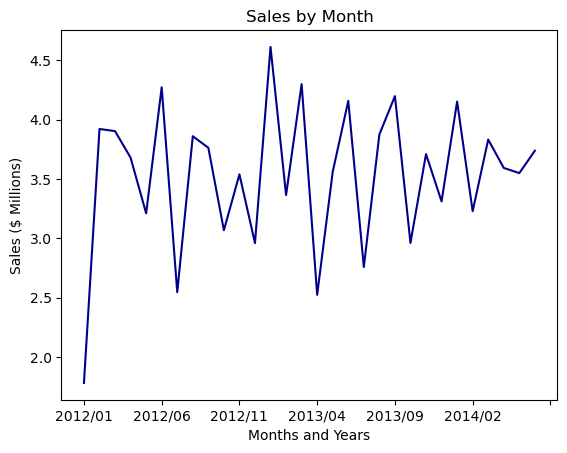

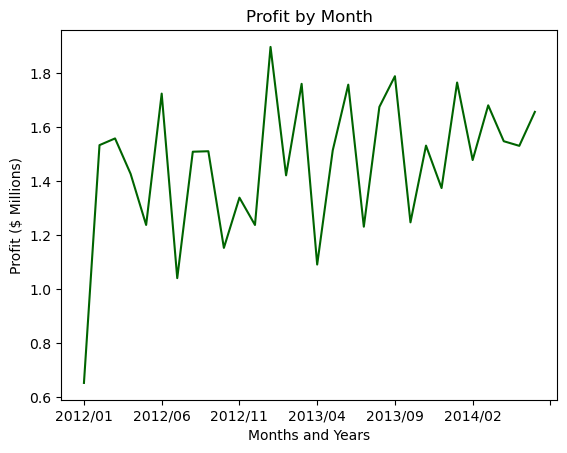

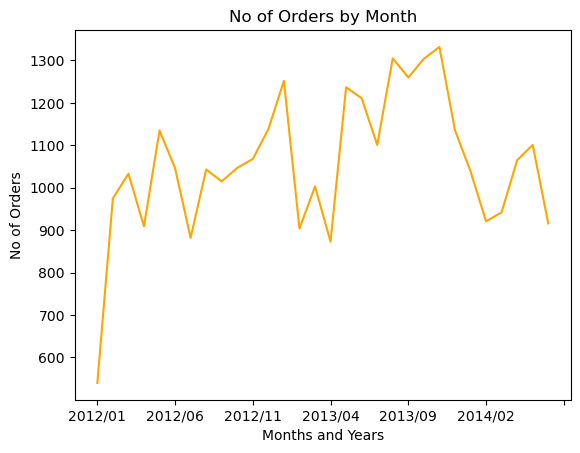

In [75]:
sales.groupby('Invoice_yearMonth')['Sales'].sum().plot(kind='line' , color='darkblue') 
plt.title("Sales by Month")
plt.xlabel("Months and Years")
plt.ylabel("Sales ($ Millions)")
plt.show()

sales.groupby('Invoice_yearMonth')['Profit'].sum().plot(kind='line' , color='darkgreen') 
plt.title("Profit by Month")
plt.xlabel("Months and Years")
plt.ylabel("Profit ($ Millions)")
plt.show()

sales.groupby('Invoice_yearMonth')['Order_number'].nunique().plot(kind='line' , color='orange') 
plt.title("No of Orders by Month")
plt.xlabel("Months and Years")
plt.ylabel("No of Orders")
plt.show()


# profit and sales shows similar pattern. So, it is important to increase sales in order to increase profit.

In [76]:
print(f"Total No of Quantity sold : {sales['Sales_qty'].sum()/1000000:.2f} Millions ")

Total No of Quantity sold : 1.83 Millions 


## Analyse Business Questions

## 1.1 Which regions and cities contribute the most and least to total sales and profit?

(all amounts in $ millions)

Best Performing Region:

 Region          USA
Sales      47.98918
Profit    18.666904
Name: 5, dtype: object

Worst Performing Region:

Region     Germany
Sales     3.400832
Profit    1.508191
Name: 0, dtype: object


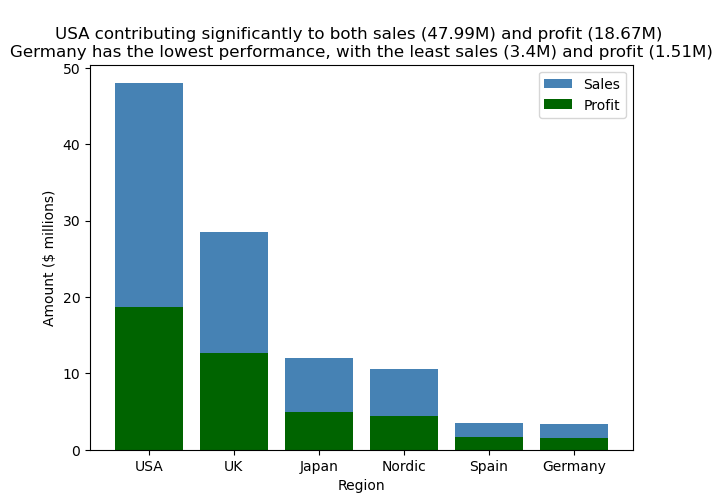

In [77]:
print("(all amounts in $ millions)\n")
# Sales and Profit by Region
# https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts
region_df = sales.groupby("Region")[["Sales", "Profit"]].sum().reset_index().sort_values(by="Sales", ascending=False)
print(f"Best Performing Region:\n\n {region_df.iloc[0]}\n")
print(f"Worst Performing Region:\n\n{region_df.iloc[-1]}")

plt.figure(figsize=(7,5))
plt.bar(region_df["Region"], region_df["Sales"], color="steelblue", label="Sales")
plt.bar(region_df["Region"], region_df["Profit"], color="darkgreen", label="Profit")
plt.xlabel("Region")
plt.ylabel("Amount ($ millions)")
plt.title("\nUSA contributing significantly to both sales (47.99M) and profit (18.67M) \n\
Germany has the lowest performance, with the least sales (3.4M) and profit (1.51M)")
plt.legend()
plt.show()


Top 5 Cities by Sales:

         City Region     Sales    Profit
14    Cardiff     UK  6.291324  2.888868
45  Leicester     UK  6.191287  2.647434
24     Denver    USA  5.914740  1.987253
59  Nashville    USA  5.664472  2.135785
31     Fresno    USA  4.190057  1.785205

Bottom 5 Cities by Sales:

          City   Region     Sales    Profit
95  Washington      USA  0.123177  0.080727
55   Milwaukee      USA  0.088204  0.042236
25     Detroit      USA  0.077708  0.039831
8       Berlin  Germany  0.077207  0.034132
36    Hannover  Germany  0.031015  0.016387


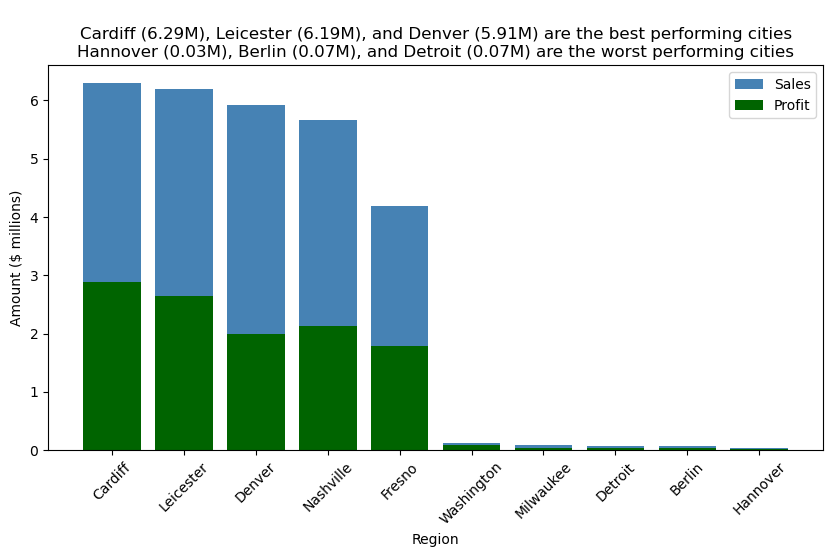

In [78]:
# Sales and Profits by Cities
city_df = sales.groupby(["City", "Region"])[["Sales", "Profit"]].sum().reset_index().sort_values(by="Sales", ascending=False)
print(f"\nTop 5 Cities by Sales:\n\n{city_df.head(5)}")
print(f"\nBottom 5 Cities by Sales:\n\n{city_df.tail(5)}")
# https://stackoverflow.com/questions/69240903/how-do-i-display-the-top-bottom-5-row-values-along-with-custom-row-values-in-m
city_df_top_bottom=pd.concat([city_df[:5], city_df[-5:]])

plt.figure(figsize=(10,5))
plt.bar(city_df_top_bottom["City"], city_df_top_bottom["Sales"], color="steelblue", label="Sales")
plt.bar(city_df_top_bottom["City"], city_df_top_bottom["Profit"], color="darkgreen", label="Profit")
plt.xlabel("Region")
plt.ylabel("Amount ($ millions)")
plt.xticks(rotation=45)
plt.title("\nCardiff (6.29M), Leicester (6.19M), and Denver (5.91M) are the best performing cities\n\
Hannover (0.03M), Berlin (0.07M), and Detroit (0.07M) are the worst performing cities")
plt.legend()
plt.show()

## 1.2 What are the Regions with highest and lowest Profit and Profit Margins?


all amounts in $ millions

Profit Margin percentages by Region :

          Total_Profit  Total_Sales  Profit_Margin
Region                                           
Spain        1.617982     3.487318      46.396184
UK          12.716181    28.440959      44.710803
Germany      1.508191     3.400832      44.347694
Nordic       4.381349    10.573250      41.438056
Japan        4.981896    12.043647      41.365344
USA         18.666904    47.989180      38.898152



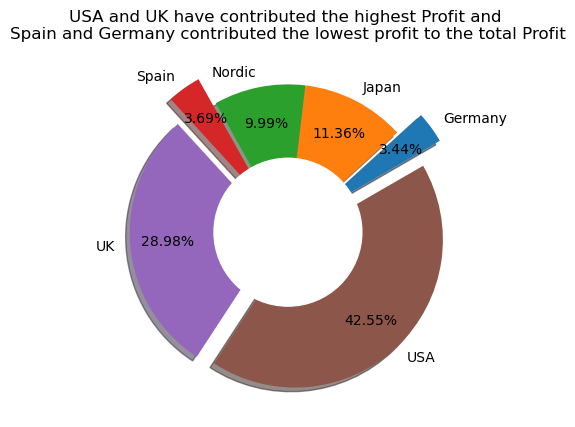

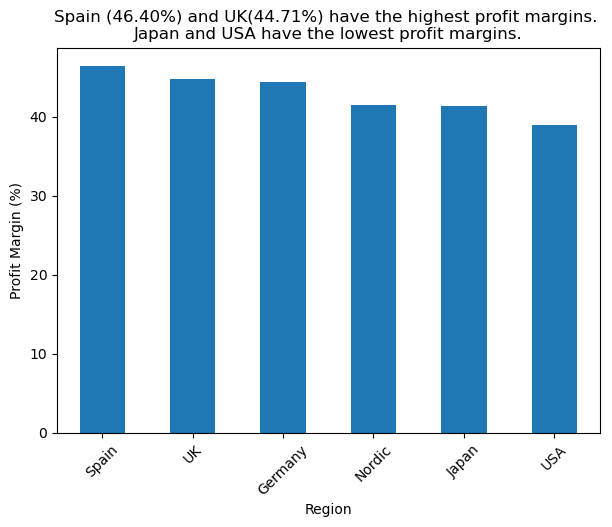

In [79]:
print("\nall amounts in $ millions\n")

# Profit and Profit Margin by Region
# https://stackoverflow.com/questions/71289938/pandas-groupby-and-agg-method-confusion-on-columns
region_p_df = sales.groupby("Region").agg(Total_Profit=("Profit", "sum"),Total_Sales=("Sales", "sum"))
region_p_df["Profit_Margin"] = (region_p_df["Total_Profit"] / region_p_df["Total_Sales"]) * 100
region_p_df_sorted=region_p_df.sort_values('Profit_Margin', ascending=False)
print(f"Profit Margin percentages by Region :\n\n {region_p_df_sorted}\n")

# Percentage of Profit by region
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
# https://www.analyticsvidhya.com/blog/2021/06/donut-plots-data-visualization-with-python/
region_p_df.Total_Profit.plot(kind='pie', autopct = '%.2f%%', pctdistance=0.75, \
startangle=30, shadow=True, explode=[0.2,0,0,0.2,0.07,0.07]) 
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("USA and UK have contributed the highest Profit and \nSpain and Germany contributed the lowest profit to the total Profit")
plt.ylabel("")
plt.show()

# Profit margin by Region
plt.figure(figsize=(7,5))
region_p_df_sorted.Profit_Margin.plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Spain (46.40%) and UK(44.71%) have the highest profit margins. \nJapan and USA have the lowest profit margins.")
plt.ylabel("Profit Margin (%)")
plt.show()

## 1.3 Are there Regions with potential for growth?


(all amounts in $ millions)

Regions those have over 40% Profit Margin but have done less than $10 million sales : 

         Total_Profit  Total_Sales  Profit_Margin
Region                                           
Germany      1.508191     3.400832      44.347694
Spain        1.617982     3.487318      46.396184


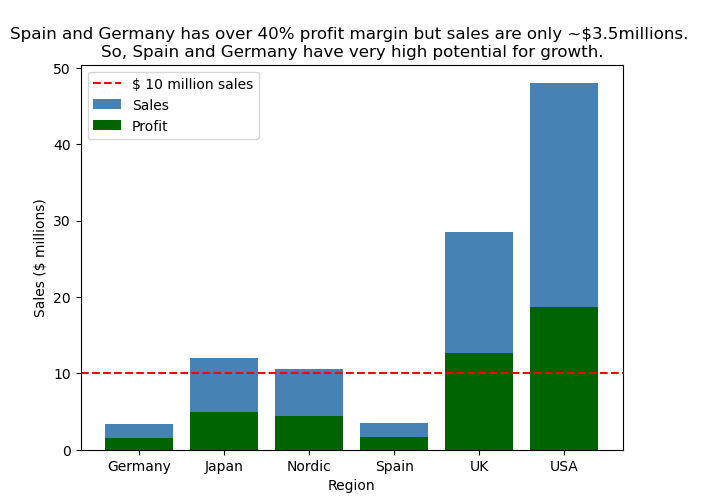

In [80]:
print("\n(all amounts in $ millions)\n")
# assume we expect over $10 million sales in a region with over 45% profit margin to consider that the region has potential for growth
potential_growth_regions = region_p_df[(region_p_df["Total_Sales"] < 10) & (region_p_df["Profit_Margin"] > 40)]
print(f"Regions those have over 40% Profit Margin but have done less than $10 million sales : \n\n{potential_growth_regions}")

plt.figure(figsize=(7, 5))
plt.bar(region_p_df.index, region_p_df["Total_Sales"], color="steelblue", label="Sales")
plt.bar(region_p_df.index, region_p_df["Total_Profit"], color="darkgreen", label="Profit")
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
plt.axhline(10, color="red", linestyle="--", label="$ 10 million sales")
plt.xlabel("Region")
plt.ylabel("Sales ($ millions)")
plt.title("\nSpain and Germany has over 40% profit margin but sales are only ~$3.5millions. \n\
So, Spain and Germany have very high potential for growth.")
plt.legend()
plt.show()

## 2.1 Which sales representatives achieve the highest and lowest sales?


all amounts in $ millions

Top 5 Sales Reps by their sales : 

     Sales_rep_name      Sales
29     Judy Thurman  13.580286
57     Stewart Wind  13.379909
35         Lee Chin   9.502669
26        John Greg   4.579891
11  Cheryle Sincock   3.964698

Bottom 5 Sales Reps by their sales : 

    Sales_rep_name     Sales
60    Teresa Lynch  0.135784
37    Marian White  0.096684
13      Craig Lary  0.071208
50  Samantha Allen  0.047717
36     Lisa Taylor  0.027831

Sales rep with highest amout of total sales : Judy Thurman with $13.58 million total Sales

Sales rep with lowest amount of total sales : Lisa Taylor with $0.03 million total Sales


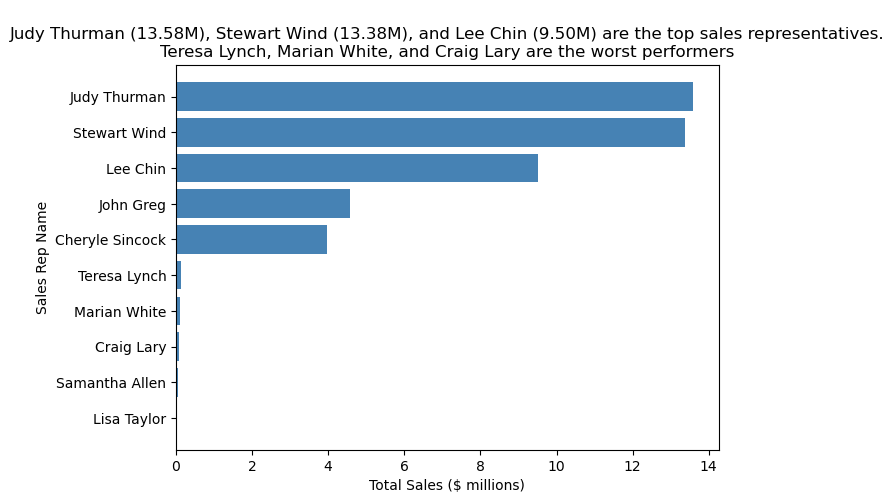

In [81]:
print("\nall amounts in $ millions\n")
rep_sales = sales.groupby("Sales_rep_name")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
print(f"Top 5 Sales Reps by their sales : \n\n{rep_sales[:5]}")
print(f"\nBottom 5 Sales Reps by their sales : \n\n{rep_sales[-5:]}")
top_bottom_sales_reps=pd.concat([rep_sales[:5],rep_sales[-5:]]) # to plot only top 5 and bottom 5

print(f"\nSales rep with highest amout of total sales : {rep_sales.iloc[0]['Sales_rep_name']} \
with ${rep_sales.iloc[0]['Sales']:.2f} million total Sales")
print(f"\nSales rep with lowest amount of total sales : {rep_sales.iloc[-1]['Sales_rep_name']} \
with ${rep_sales.iloc[-1]['Sales']:.2f} million total Sales")

plt.figure(figsize=(7,5))
plt.barh(top_bottom_sales_reps["Sales_rep_name"], top_bottom_sales_reps["Sales"], color="steelblue")
plt.xlabel("Total Sales ($ millions)")
plt.ylabel("Sales Rep Name")
plt.title("\nJudy Thurman (13.58M), Stewart Wind (13.38M), and Lee Chin (9.50M) are the top sales representatives.\n\
Teresa Lynch, Marian White, and Craig Lary are the worst performers")
#https://stackoverflow.com/questions/2051744/how-to-invert-the-x-or-y-axis
plt.gca().invert_yaxis()  
plt.show()

## 2.2 What is the relationship between sales rep performance and their regions?


all amounts in $ millions

Best Performing Sales Reps in Each Region:

      Region   Sales_rep_name  Total_Sales  Total_Profit
39   Germany        TAGnology     1.260464      0.551942
49     Japan    Brenda Gibson     1.723571      0.330712
115   Nordic  Cheryle Sincock     2.533618      0.739251
187    Spain    Karl Anderson     0.550802      0.257751
238       UK     Judy Thurman    13.439993      6.120201
328      USA     Stewart Wind    13.116918      4.642935


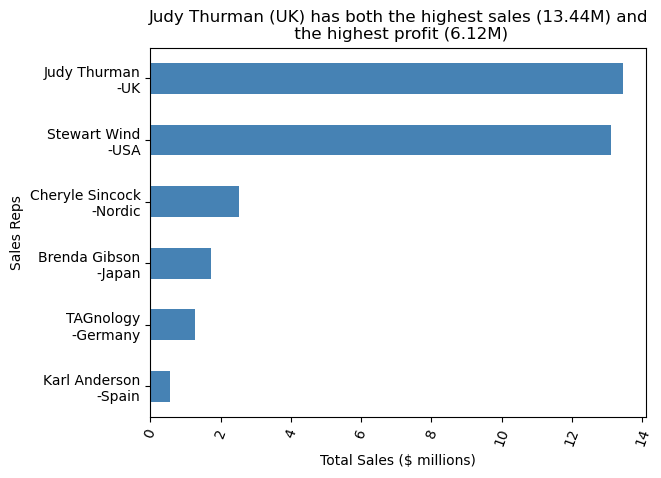

In [82]:
print("\nall amounts in $ millions\n")
rep_region=sales.groupby(["Region", "Sales_rep_name"]).agg(Total_Sales=("Sales", "sum"),Total_Profit=("Profit", "sum")).reset_index()

# best reps in each Region
#https://stackoverflow.com/questions/60083433/what%C2%B4s-the-difference-between-idxmax-and-max-inside-a-groupby-pandas
print(f"Best Performing Sales Reps in Each Region:\n\n{rep_region.loc[rep_region.groupby("Region")["Total_Sales"].idxmax()]}")
best_reps = rep_region.loc[rep_region.groupby("Region")["Total_Sales"].idxmax()].sort_values("Total_Sales", ascending = False) 
best_reps['Xlabels'] = rep_region.Sales_rep_name+'\n-'+rep_region.Region # xlabels shows sales rep name and region
best_reps.plot(kind="barh", x="Xlabels", y="Total_Sales", legend=False, color="steelblue")
plt.ylabel("Sales Reps")
plt.xlabel("Total Sales ($ millions)")
plt.title("Judy Thurman (UK) has both the highest sales (13.44M) and\n the highest profit (6.12M)")
plt.xticks(rotation=70)
plt.gca().invert_yaxis() 
plt.show()


Worst Performing Sales Reps in Each Region:

      Region Sales_rep_name  Total_Sales  Total_Profit
21   Germany    Lisa Taylor     0.000606      0.000279
72     Japan   Judy Thurman     0.000394      0.000150
157   Nordic   Scott Powell     0.000312      0.000178
189    Spain       Lee Chin     0.000115      0.000069
232       UK   Janice Scott     0.000177      0.000081
307      USA    Lisa Taylor     0.001650      0.000907


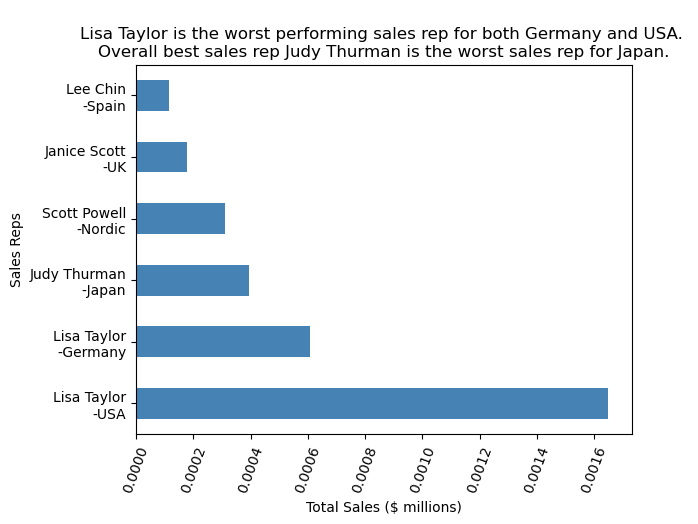

In [83]:
# Worst Rep in each Region
print(f"\nWorst Performing Sales Reps in Each Region:\n\n{rep_region.loc[rep_region.groupby("Region")["Total_Sales"].idxmin()]}")
worst_reps = rep_region.loc[rep_region.groupby("Region")["Total_Sales"].idxmin()].sort_values("Total_Sales", ascending = True) 
worst_reps['Xlabels'] = rep_region.Sales_rep_name+'\n-'+rep_region.Region # xlabels shows sales rep name and region
worst_reps.plot(kind="barh", x="Xlabels", y="Total_Sales", legend=False, color="steelblue")
plt.ylabel("Sales Reps")
plt.xlabel("Total Sales ($ millions)")
plt.title("\nLisa Taylor is the worst performing sales rep for both Germany and USA. \n\
Overall best sales rep Judy Thurman is the worst sales rep for Japan.")
plt.xticks(rotation=70)
plt.gca().invert_yaxis() 
plt.show()

## 3.1 How do sales and profit vary by product group, product line, and product type?


all amounts in $ millions

  Product_line      Sales     Profit
1         Food  96.202131  40.197758
0        Drink   9.733056   3.674746


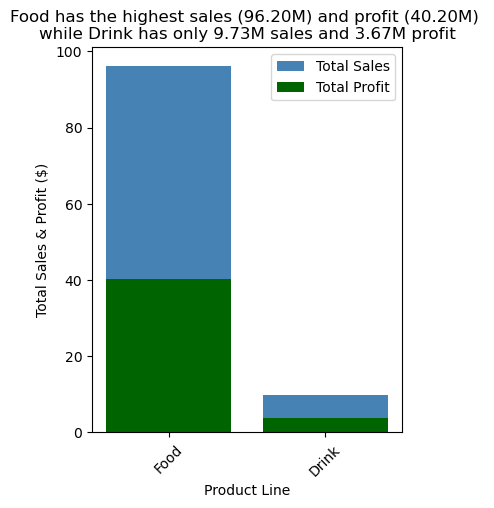

In [84]:
# Product Line
print("\nall amounts in $ millions\n")
prod_line_sales = sales.groupby("Product_line")[["Sales", "Profit"]].sum().reset_index().sort_values(by="Sales", ascending=False)
print(prod_line_sales)
plt.figure(figsize=(4, 5))
plt.bar(prod_line_sales['Product_line'], prod_line_sales["Sales"], color="steelblue", label="Total Sales")
plt.bar(prod_line_sales['Product_line'], prod_line_sales["Profit"], color="darkgreen", label="Total Profit")
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
plt.xlabel("Product Line")
plt.ylabel("Total Sales & Profit ($)")
plt.title("Food has the highest sales (96.20M) and profit (40.20M) \nwhile Drink has only 9.73M sales and 3.67M profit")
plt.legend()
plt.xticks(rotation=45)
plt.show()

Sales and Profit by Product Group:

          Product_group      Sales    Profit
11              Produce  24.313537  9.531841
5       Canned Products  20.651788  7.787320
7                  Deli  14.831954  6.286527
9          Frozen Foods   9.567448  4.718727
13               Snacks   8.756348  4.117093
6                 Dairy   7.343422  2.405350
2          Baking Goods   6.785080  3.244639
3             Beverages   6.420948  2.811784
14        Starchy Foods   3.449055  1.668091
0   Alcoholic Beverages   2.302767  0.540231
4       Breakfast Foods   0.683764  0.333383
1           Baked Goods   0.462257  0.240158
8                  Eggs   0.249182  0.127722
10                 Meat   0.074230  0.032641
12              Seafood   0.043407  0.026998



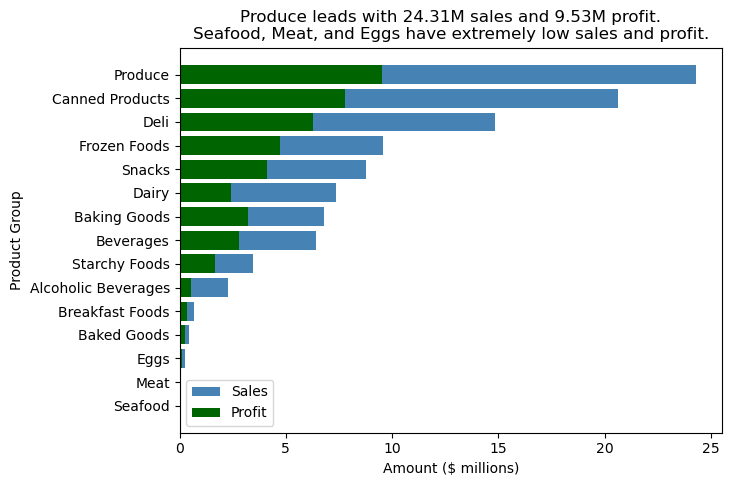

In [85]:
# Product Group
prod_group_sales = sales.groupby("Product_group")[["Sales", "Profit"]].sum().reset_index().sort_values(by="Sales", ascending=False)
print(f"Sales and Profit by Product Group:\n\n{prod_group_sales}\n")
plt.figure(figsize=(7,5))
plt.barh(prod_group_sales.Product_group, prod_group_sales["Sales"], color="steelblue", label="Sales")
plt.barh(prod_group_sales.Product_group, prod_group_sales["Profit"], color="darkgreen", label="Profit")
plt.xlabel("Amount ($ millions)")
plt.ylabel("Product Group")
plt.title("Produce leads with 24.31M sales and 9.53M profit.\nSeafood, Meat, and Eggs have extremely low sales and profit.")
plt.gca().invert_yaxis() 
plt.legend()
plt.show()

Sales and Profit by Product Type:

            Product_type      Sales    Profit
30            Vegetables  22.463445  8.832879
21                  Meat  14.616474  6.215414
9          Canned Shrimp  12.102610  4.486755
27           Snack Foods   7.455452  3.575814
13                 Dairy   7.343422  2.405350
18                 Fruit   5.022997  2.087841
0           Baking Goods   3.467162  1.690398
29         Starchy Foods   3.449055  1.668091
20      Jams and Jellies   3.317918  1.554240
11           Canned Tuna   3.272025  1.112120
23                 Pizza   3.153028  1.729482
8        Canned Sardines   2.636989  1.114045
16       Frozen Desserts   2.544443  1.205461
1          Beer and Wine   2.302767  0.540231
12  Carbonated Beverages   1.872551  0.787129
19         Hot Beverages   1.780768  0.797649
14                Drinks   1.450756  0.683030
24  Pure Juice Beverages   1.316873  0.543976
4                  Candy   1.300896  0.541279
3        Breakfast Foods   1.293027  0.639681

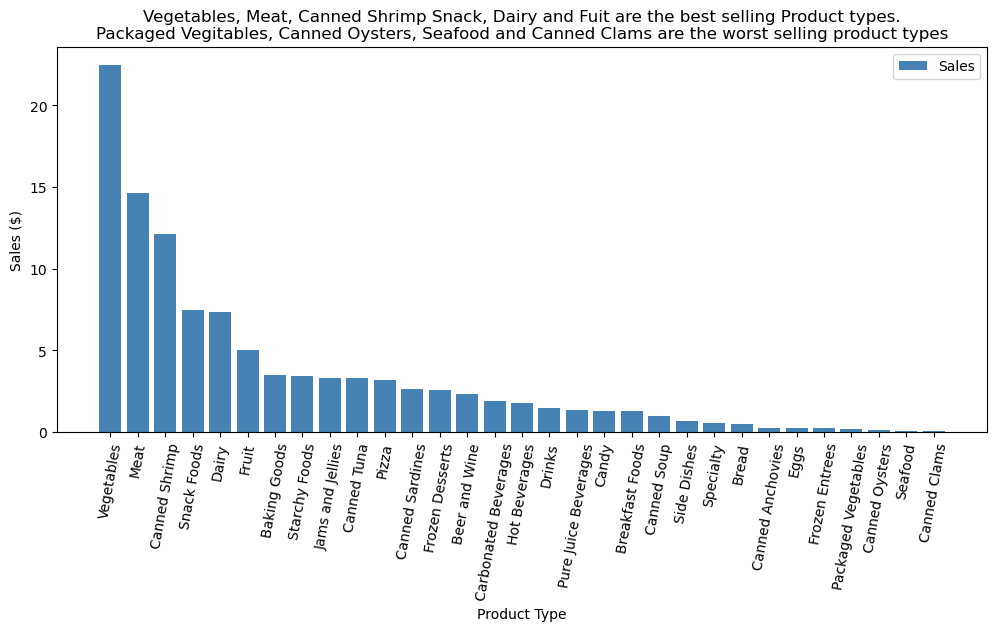

In [86]:
# Product Type
prod_type_sales = sales.groupby("Product_type")[["Sales", "Profit"]].sum().reset_index().sort_values(by="Sales", ascending=False)
print(f"Sales and Profit by Product Type:\n\n{prod_type_sales}\n\n")
plt.figure(figsize=(12, 5))
plt.bar(prod_type_sales.Product_type, prod_type_sales["Sales"], color="steelblue", label="Sales")
plt.xlabel("Product Type")
plt.ylabel("Sales ($)")
plt.title("Vegetables, Meat, Canned Shrimp Snack, Dairy and Fuit are the best selling Product types.\n\
Packaged Vegitables, Canned Oysters, Seafood and Canned Clams are the worst selling product types")
plt.xticks(rotation=80)
plt.legend()
plt.show()

## 3.2 Which Products Groups and Product types have the highest and lowest profit margins?

Product groups by Profit Margin:

                     Total_Profit  Total_Sales  Profit_margin_prod_group
Product_group                                                           
Seafood                  0.026998     0.043407                 62.196446
Baked Goods              0.240158     0.462257                 51.953431
Eggs                     0.127722     0.249182                 51.256566
Frozen Foods             4.718727     9.567448                 49.320645
Breakfast Foods          0.333383     0.683764                 48.757105
Starchy Foods            1.668091     3.449055                 48.363713
Baking Goods             3.244639     6.785080                 47.820195
Snacks                   4.117093     8.756348                 47.018383
Meat                     0.032641     0.074230                 43.972573
Beverages                2.811784     6.420948                 43.790789
Deli                     6.286527    14.831954                 42.385021
Produce          

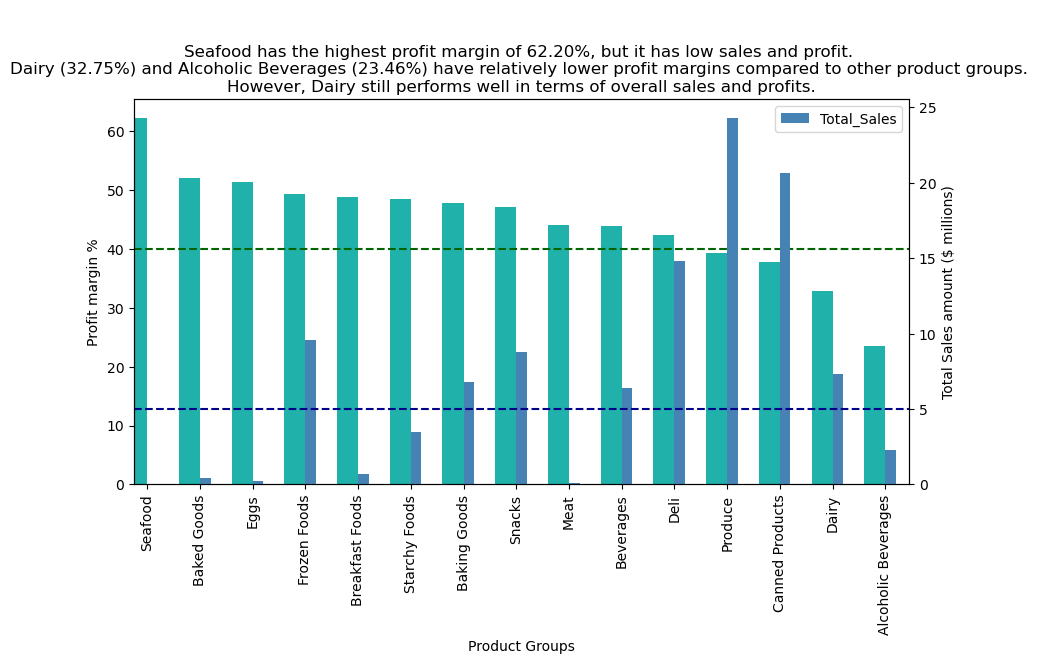

In [87]:
# Product group
profit_margin_prod_group=sales.groupby("Product_group").agg(Total_Profit=("Profit", "sum"),Total_Sales=("Sales", "sum"))
profit_margin_prod_group["Profit_margin_prod_group"] = (profit_margin_prod_group["Total_Profit"] / profit_margin_prod_group["Total_Sales"]) * 100
top_products_group = profit_margin_prod_group.sort_values(by="Profit_margin_prod_group", ascending=False)

print(f"Product groups by Profit Margin:\n\n{top_products_group}")
# https://stackoverflow.com/questions/24183101/bar-plot-with-two-bars-and-two-y-axis
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = 0.4
top_products_group.Profit_margin_prod_group.plot(kind='bar', color='lightseagreen', ax=ax, width=0.4, position=1)
top_products_group.Total_Sales.plot(kind='bar', color='steelblue', ax=ax2, width=0.2, position=0)
ax.set_ylabel('Profit margin %')
ax2.set_ylabel('Total Sales amount ($ millions)')
ax.set_xlabel("Product Groups")
plt.legend()
ax.axhline(40, color="darkgreen", linestyle="--", label="40% profit margin")
ax2.axhline(5, color="darkblue", linestyle="--", label="40% profit margin")
ax.set_title("\n\nSeafood has the highest profit margin of 62.20%, but it has low sales and profit. \n\
Dairy (32.75%) and Alcoholic Beverages (23.46%) have relatively lower profit margins compared to other product groups. \n\
However, Dairy still performs well in terms of overall sales and profits.")
plt.show()

Product types by Profit Margin:

                      Total_Profit  Total_Sales  Profit_margin_prod_type
Product_type                                                            
Seafood                   0.026998     0.043407                62.196446
Pizza                     1.729482     3.153028                54.851451
Packaged Vegetables       0.099570     0.189771                52.468228
Bread                     0.240158     0.462257                51.953431
Eggs                      0.127722     0.249182                51.256566
Frozen Entrees            0.119300     0.238742                49.970051
Breakfast Foods           0.639681     1.293027                49.471607
Baking Goods              1.690398     3.467162                48.754526
Canned Clams              0.017326     0.035675                48.565447
Starchy Foods             1.668091     3.449055                48.363713
Snack Foods               3.575814     7.455452                47.962405
Frozen Desserts   

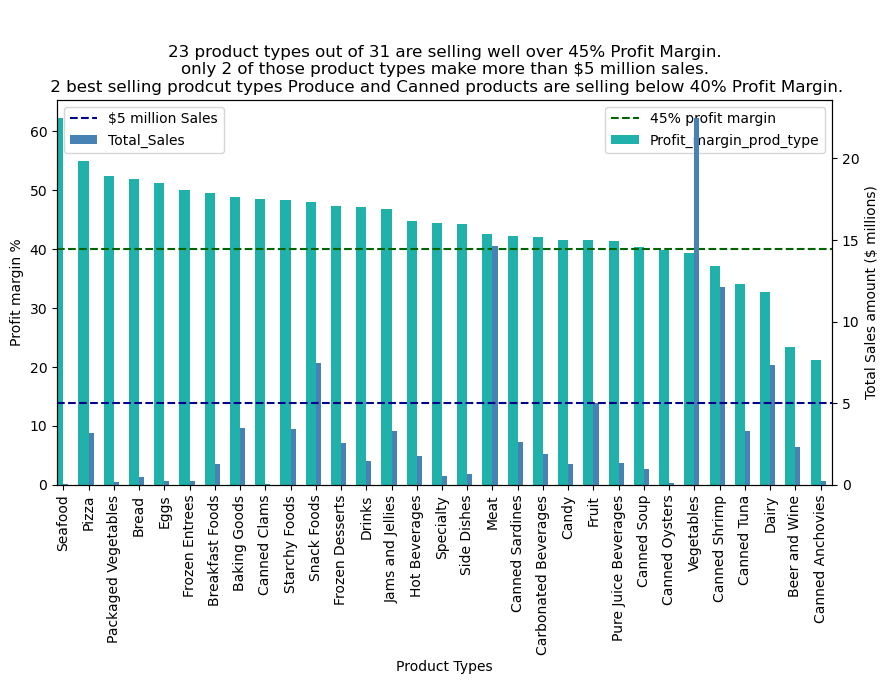

In [88]:
# Product Type
profit_margin_prod_type=sales.groupby("Product_type").agg(Total_Profit=("Profit", "sum"),Total_Sales=("Sales", "sum"))
profit_margin_prod_type["Profit_margin_prod_type"] = (profit_margin_prod_type["Total_Profit"] / profit_margin_prod_type["Total_Sales"]) * 100
top_products_types = profit_margin_prod_type.sort_values(by="Profit_margin_prod_type", ascending=False)

print(f"Product types by Profit Margin:\n\n{top_products_types}")
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = 0.4
top_products_types.Profit_margin_prod_type.plot(kind='bar', color='lightseagreen', ax=ax, width=0.4, position=1)
top_products_types.Total_Sales.plot(kind='bar', color='steelblue', ax=ax2, width=0.2, position=0)
ax.set_ylabel('Profit margin %')
ax2.set_ylabel('Total Sales amount ($ millions)')
ax.set_xlabel("Product Types")
ax.axhline(40, color="darkgreen", linestyle="--", label="45% profit margin")
ax2.axhline(5, color="darkblue", linestyle="--", label="$5 million Sales")
ax.legend()
ax2.legend()
ax.set_title("\n\n23 product types out of 31 are selling well over 45% Profit Margin.\n\
only 2 of those product types make more than $5 million sales.\n \
2 best selling prodcut types Produce and Canned products are selling below 40% Profit Margin.")
plt.show()

# **5. Interpret**

### Insights and Recommendations:

- USA is the best-performing region with sales (47.99M) and profit (18.67M). Germany has the lowest performance, with the least sales (3.4M) and profit (1.51M). **Identify the marketig, pricing and sales strategies used in USA and UK and apply them to underperforming regions such as Germany and Spain.**
  
- The top performing cities in terms of sales are Cardiff (6.29M), Leicester (6.19M), and Denver (5.91M). The worst performing cities with the lowest sales are Hannover (0.03M), Berlin (0.07M), and Detroit (0.07M). **Investigate why cities with massive economies such as Washinton and Berlin are under performing. Check if the reason for this is unmatching product line or ineffective marketing and advertising.**

- USA and UK have contributed the highest profit and Germany and Spain have contributed the lowest profit to the total profit. Spain (46.40%) and UK(44.71%) have the highest profit margins. Japan and USA have the lowest profit margins. **Since USA have the lowest profit margin and the highest sales, it is recommended to revise prices for low margin products for USA. Spain has the highest profit margin and it can be recommend a price reduction to increase sales**

- Spain and Germany has over 40% profit margin but sales are only ~$3.5millions. So, Spain and Germany have very high potential for growth. **Both countries can spend more on advertising, free delivery or other marketing tools to increase sales.**

- Judy Thurman (13.58M), Stewart Wind (13.38M), and Lee Chin (9.50M) are the top sales representatives.Teresa Lynch, Marian White, and Craig Lary shows the worst sales performance. **Train low performing sales reps by identifying what makes Judy Thurman, Stewart Wind so successful.** 
  
- Judy Thurman (UK) has both the highest sales (13.44M) and the highest profit (6.12M). Lisa Taylor is the worst performing sales rep for both Germany and USA. Overall best sales rep Judy Thurman is the worst sales rep for Japan. **Sales strategies need to used in one region may not suitable for another region. Identify sales strategies needed for specific region and train staff accordingly.**
- Food has the highest sales (96.20M) and profit (40.20M) while Drink has only 9.73M sales and 3.67M profit.Seafood stands out with the highest profit margin (62.20%) among product groups, followed by Baked Goods (51.95%) and Eggs (51.26%).Produce leads with 24.31M sales and 9.53M profit. Seafood, Meat, and Eggs have extremely low sales and profit. Vegetables, Meat, Canned Shrimp Snack, Dairy and Fruit are the best selling Product types. Packaged Vegitables, Canned Oysters, Seafood and Canned Clams are the worst selling product types. **Identify and focus more on high performing product categories and types and introduce more items into these categories and types. Sell low performing category or type items by lowering price or promote them as bundle discount with high performing categories or types.**
- Seafood has the highest profit margin of 62.20%, but it has low sales and profit. Dairy (32.75%) and Alcoholic Beverages (23.46%) have relatively lower profit margins compared to other product groups. However, Dairy still performs well in terms of overall sales and profits. 23 product types out of 31 are selling well over 45% Profit Margin in only 2 of those product types make more than 5M sales. Best selling prodcut types Produce and  and Canned products are selling below 40% Profit Margin. **Reduce the price for high profit margin but low sales performing products and coverup that loss in profit by increasing price of low margin and high sales performing prducts such as vegitables, meat and Canned Shrimp**

ps. Recommandations includes search results form google searches.